In [1]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt

In [2]:
gas1 = ct.Solution('gri30.xml')

In [3]:
gas1.TPX = 1200, 3*ct.one_atm, 'CH4:0.5, O2:1, N2:3.76'

In [4]:
r = ct.Reactor(gas1)

In [5]:
sim = ct.ReactorNet([r])
time = 0
times = np.zeros(200)
data = np.zeros([200,4])

New test
     t [s]      T [K]   vol [m3]       u [J/kg]
 2.000e-04   1199.997      1.188   5.008789e+05
 4.000e-04   1200.001      1.188   5.008789e+05
 6.000e-04   1200.018      1.188   5.008789e+05
 8.000e-04   1200.049      1.188   5.008789e+05
 1.000e-03   1200.093      1.188   5.008789e+05
 1.200e-03   1200.144      1.188   5.008789e+05
 1.400e-03   1200.202      1.188   5.008789e+05
 1.600e-03   1200.263      1.188   5.008789e+05
 1.800e-03   1200.328      1.188   5.008789e+05
 2.000e-03   1200.396      1.188   5.008789e+05
 2.200e-03   1200.468      1.188   5.008789e+05
 2.400e-03   1200.543      1.188   5.008789e+05
 2.600e-03   1200.622      1.188   5.008789e+05
 2.800e-03   1200.706      1.188   5.008789e+05
 3.000e-03   1200.793      1.188   5.008789e+05
 3.200e-03   1200.885      1.188   5.008789e+05
 3.400e-03   1200.981      1.188   5.008789e+05
 3.600e-03   1201.082      1.188   5.008789e+05
 3.800e-03   1201.187      1.188   5.008789e+05
 4.000e-03   1201.298      1.18

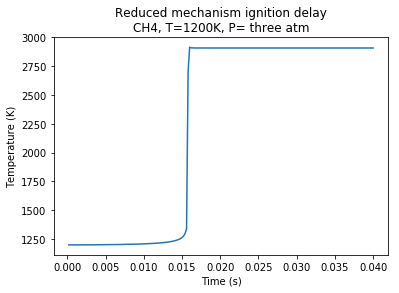

In [6]:
print ('New test')

print('%10s %10s %10s %14s' % ('t [s]', 'T [K]', 'vol [m3]', 'u [J/kg]'))
for n in range(200):
    time += 2.e-4
    sim.advance(time)
    times[n] = time
    data[n,0] = r.T
    print('%10.3e %10.3f %10.3f %14.6e' % (sim.time, r.T, r.thermo.v, r.thermo.u))
    
plt.plot(times,data[:,0])
plt.xlabel('Time (s)')
plt.ylabel('Temperature (K)')
title = 'Reduced mechanism ignition delay CH4, T=1200K, P= three atm'
from textwrap import wrap
plt.title('\n'.join(wrap(title,33)))
plt.rc('xtick', labelsize=1)
plt.show()